In [1]:
documents = ["This little cat came to play when I was eating at a restaurant. I had to take a photo.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tabs in google chrome you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with the current version of the google translate app.",
             "Key promoter extension for Google Chrome."]

In [2]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
import pandas as pd
#from nltk.stem import WordNetLemmatizer


In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def text_preprocesser(text):
    text= re.sub(r'\W',' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    tokens = [word for word in tokens if len(word)>=3]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 

In [5]:
text_preprocesser(documents[0])

'little cat came play eating restaurant take photo'

In [6]:
tokens = text_preprocesser(" ".join(documents)).split()

In [7]:
from collections import Counter
dict_counts = Counter(tokens)
dict_counts

Counter({'little': 1,
         'cat': 3,
         'came': 1,
         'play': 1,
         'eating': 1,
         'restaurant': 1,
         'take': 1,
         'photo': 2,
         'merley': 1,
         'best': 2,
         'squooshy': 1,
         'kitten': 1,
         'belly': 1,
         'google': 4,
         'translate': 2,
         'app': 2,
         'incredible': 1,
         'open': 1,
         '100': 1,
         'tabs': 1,
         'chrome': 2,
         'get': 1,
         'smiley': 1,
         'face': 1,
         'ever': 1,
         'taken': 1,
         'climbing': 1,
         'ninja': 1,
         'impressed': 1,
         'current': 1,
         'version': 1,
         'key': 1,
         'promoter': 1,
         'extension': 1})

([<matplotlib.axis.XTick at 0x7fd3aafad8e0>,
 [Text(0, 0, 'google'),
  Text(1, 0, 'cat'),
  Text(2, 0, 'photo'),
  Text(3, 0, 'app'),
  Text(4, 0, 'chrome')])

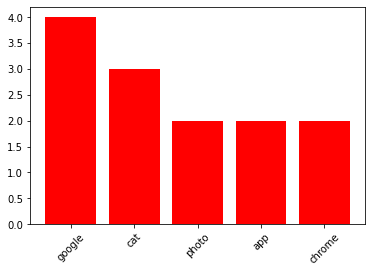

In [8]:
labels, values = zip(*dict_counts.items())
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data and show top 5 words
labels = np.array(labels)[indSort][0:5]
values = np.array(values)[indSort][0:5]

indexes = np.arange(len(labels))

plt.bar(indexes, values, color="red")

# add labels
plt.xticks(indexes, labels, rotation=45)

In [9]:
#pip install WordCloud
from wordcloud import WordCloud

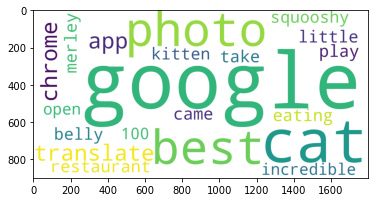

In [10]:
wc = WordCloud(width=1800, height=900, background_color="white",
               max_words = 20, relative_scaling = 0.5, 
               normalize_plurals = False).generate_from_frequencies(dict_counts)
plt.imshow(wc)

In [11]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=text_preprocesser)

In [12]:
tfidf_vectorizer

TfidfVectorizer(preprocessor=<function text_preprocesser at 0x7fd3aa840ca0>)

In [13]:
tfidf = tfidf_vectorizer.fit_transform(documents)

In [14]:
df= pd.DataFrame(tfidf.toarray().transpose(), index=tfidf_vectorizer.get_feature_names())
df.columns = ['doc1', 'doc2', 'doc3', 'doc4','doc5', 'doc6', 'doc7', 'doc8']

In [15]:
df

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8
100,0.000000,0.000000,0.000000,0.375176,0.000000,0.000000,0.000000,0.000000
app,0.000000,0.000000,0.500240,0.000000,0.000000,0.000000,0.382258,0.000000
belly,0.000000,0.461149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
best,0.000000,0.386479,0.000000,0.000000,0.422875,0.000000,0.000000,0.000000
came,0.372023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cat,0.269044,0.000000,0.000000,0.000000,0.364907,0.455297,0.000000,0.000000
chrome,0.000000,0.000000,0.000000,0.314427,0.000000,0.000000,0.000000,0.413674
climbing,0.000000,0.000000,0.000000,0.000000,0.000000,0.629565,0.000000,0.000000
current,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456112,0.000000
eating,0.372023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
df['doc1'].values.reshape(1, -1).shape

(1, 34)

In [18]:
for i in range(1, 9):
    globals()["txt" + str(i)] =df[df.columns[i-1]].values.reshape(1, -1)  

In [19]:
txt3

array([[0.        , 0.50023967, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.37847576,
        0.        , 0.59688913, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.50023967, 0.        ]])

In [20]:
print("Similarity txt1 and txt2:", cosine_similarity(txt1, txt2))

Similarity txt1 and txt2: [[0.]]


In [21]:
print("Similarity txt3 and txt7:", cosine_similarity(txt3, txt7))

Similarity txt3 and txt7: [[0.49190046]]


In [22]:
print("Similarity txt1 and txt3:", cosine_similarity(txt1, txt5))

Similarity txt1 and txt3: [[0.23002174]]


In [23]:
print("Similarity txt1 and txt7:", cosine_similarity(df['doc1'].values.reshape(1, -1), df['doc6'].values.reshape(1, -1)))

Similarity txt1 and txt7: [[0.12249497]]


In [24]:
txt7

array([[0.        , 0.38225757, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.45611213, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28921181,
        0.45611213, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.38225757, 0.45611213]])